In [1]:
# Mengimport tkinter, pandas, matplotlib, math, openpxl
import tkinter as tk #import tkinter
from tkinter import filedialog #import filedialog from tkinter
import pandas as pd
import matplotlib.pyplot as plt #import matplotlib
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg #import matplotlib
import math #import math
import openpyxl #import openpyxl
from tkinter import ttk #import ttk dari tkinter

# Membuat class GUIApp 
class GUIApp: #nama class
    # Method seft
    def __init__(self, root): 
        self.root = root #simpan root ke self.root
        self.root.title("UAS PAD H / 215314026 / Rosa") #membuat nama title 

        # Mendapatkan ukuran layar
        screen_width = self.root.winfo_screenwidth() #mendapatkan lebar layar
        screen_height = self.root.winfo_screenheight() #mendapatkan tinggi layar

        # Mengatur ukuran jendela
        window_width = math.floor(screen_width * 0.3) #menghitung lebar layar
        window_height = math.floor(screen_height * 0.3) #menghitung tinggi layar
        self.root.geometry(f"{window_width}x{window_height}") #mengatur ukuran jendela 

        self.center_window() #manggil self.center_window() 
        self.create_menus() #manggil self.create_menus()

    # Method center_window
    def center_window(self): 
        self.root.update_idletasks()
        window_width = self.root.winfo_width()
        window_height = self.root.winfo_height()
        x = math.floor((self.root.winfo_screenwidth() - window_width) / 2)
        y = math.floor((self.root.winfo_screenheight() - window_height) / 2)
        self.root.geometry(f"+{x}+{y}")

    # Method untuk menampilkan menu
    def create_menus(self):
        # Membuat label "Pilih Menu"
        label_menu = tk.Label(self.root, text="Pilih Menu") #buat label
        label_menu.pack(pady=10) #nempatin label ke jendela 

        # Membuat tombol "Ambil Data"
        btn_ambil_data = tk.Button(self.root, text="Ambil Data", command=self.take_data) #buat button
        btn_ambil_data.pack(pady=5) #nempatin button ke jendela
        
        # Membuat tombol "Tambah Data"
        btn_tambah_data = tk.Button(self.root, text="Tambah Data", command=self.insert_data) #buat button
        btn_tambah_data.pack(pady=5) #nempatin button ke jendela

        # Membuat tombol "Statistika Data"
        btn_statistika_data = tk.Button(self.root, text="Statistika Data", command=self.show_statistics) #buat button
        btn_statistika_data.pack(pady=5) #nempatin button ke jendela

        # Membuat tombol "Grafik Produksi"
        btn_grafik_produksi = tk.Button(self.root, text="Grafik Produksi", command=self.show_graph) #buat button
        btn_grafik_produksi.pack(pady=5) #nempatin button ke jendela

        # Membuat tombol "Keluar"
        btn_keluar = tk.Button(self.root, text="Keluar", command=self.exit_program) #buat button
        btn_keluar.pack(side=tk.BOTTOM, pady=10) #nempatin button ke jendela
         
    # Method untuk mengambil data
    def take_data(self): 
        filename = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx")]) 
        if filename: #persyaratan if
            df = pd.read_excel(filename) #baca data excel dari masukan file yang dipili

            take_frame = tk.Toplevel(self.root) #buat objek jendela baru diatas jendela utama
            take_frame.title("Ambil Data") #buat title
            
            window_width = math.floor(self.root.winfo_screenwidth() * 0.7) #hitung lebar jendela
            window_height = math.floor(self.root.winfo_screenheight() * 0.7) #hitung tinggi jendela
            take_frame.geometry(f"{window_width}x{window_height}") #mengatur ukuran jendela

            table_frame = tk.Frame(take_frame) #buat objek buat taruh table di jendela
            table_frame.pack(fill=tk.BOTH, expand=True) #ngatur tata letak objek

            table = ttk.Treeview(table_frame, columns=list(df.columns), show='headings') #buat kolom sesuai dengan df

            for col in df.columns: #iterasi setiap kolom df
                table.heading(col, text=col) #ngatur teks heading sesuai df

            for row in df.itertuples(index=False): #iterasi setiap baris df
                table.insert('', 'end', values=row) #masuki nilai dari baris df ke tabel

            table.pack(side=tk.LEFT, fill=tk.BOTH, expand=True) #ngatur tata letak tabel
        
        
    # Method untuk menampilkan insert data
    def insert_data(self):
        # Menampilkan frame baru untuk insert data
        stats_frame = tk.Toplevel(self.root) #buat objek jendela baru diatas jendela utama
        stats_frame.title("Tambah Data") #buat title
        
        # Untuk menyimpan inputan ke xlsx
        def simpan_data():
            provinsi = insert_provinsi.get() #mendapatkan nilai dari input
            kacang_merah = insert_kacangmerah.get() #mendapatkan nilai dari input
            
            # Menambahkan data ke file xlsx 
            wb = openpyxl.load_workbook('Produksi_Tanaman_Sayuran.xlsx') #load excel 
            sheet = wb.active #ambil lembar aktif 
            sheet.append([provinsi, kacang_merah]) #menambahkan data
            wb.save('Produksi_Tanaman_Sayuran.xlsx') #menyimpan perubahan
            wb.close() #menutup objek 
            
            # Menampilkan pesan disaat berhasil memasukkan data
            tk.messagebox.showinfo("Insert Data", "Data berhasil ditambahkan")

            # Menutup frame insert data setelah data disimpan
            stats_frame.destroy()
            
        # Membuat label dan input untuk Provinsi
        label_provinsi = tk.Label(stats_frame, text="Masukkan Provinsi:") #buat label
        label_provinsi.pack(pady=10) #nempatin label ke jendela 
        insert_provinsi = tk.Entry(stats_frame) #buat input 
        insert_provinsi.pack(pady=10) #nempatin input ke jendela

        # Membuat label dan input untuk Produksi Sayuran Kacang Merah
        label_kacangmerah = tk.Label(stats_frame, text="Masukkan Produksi Sayuran Kacang Merah:") #buat label
        label_kacangmerah.pack(pady=10) #nempatin label ke jendela
        insert_kacangmerah = tk.Entry(stats_frame) #buat input
        insert_kacangmerah.pack(pady=10) #nempatin input ke jendela

        # Tombol simpan data
        button_simpan = tk.Button(stats_frame, text="Simpan Data", command=simpan_data) #buat button
        button_simpan.pack(side=tk.BOTTOM, pady=10) #nempatin button ke jendela 
        

    # Method untuk melihat statistika 
    def show_statistics(self):
        # Menampilkan frame baru untuk statistika
        stats_frame = tk.Toplevel(self.root) #buat objek jendela baru diatas jendela utama
        stats_frame.title("Statistika Data") #buat title
        
        # Membaca data dari excel 
        df = pd.read_excel('Produksi_Tanaman_Sayuran.xlsx')

        # Mengkonvert agar kacang merah menjadi int karena tidak bisa membaca float
        df['Provinsi'] = df['Provinsi'].astype('str') #konvert data provinsi dalam string
        df['KacangMerah2020'] = df['KacangMerah2020'].astype('int') #konvert data kacangmerah2020 dalam int

        # Hitung statistik min, max, mean
        produksi_max = df['KacangMerah2020'].max() #cari max
        produksi_min = df['KacangMerah2020'].min() #cari min
        produksi_avg = df['KacangMerah2020'].mean() #cari rata"

        # Buat grafik diagram batang
        fig, ax = plt.subplots(figsize=(8, 6)) #mengatur ukuran
        ax.bar(df['Provinsi'], df['KacangMerah2020']) #membuat bar chart 
        ax.set_title('Produksi Tanaman Sayuran Kacang Merah 2020') #set title
        ax.set_xlabel('Provinsi') #buat label sumbux
        ax.set_ylabel('Jumlah Produksi Kacang Merah 2020 (Ton)') #buat label sumbuy
        ax.tick_params(axis='x', rotation=90) #ngatur tulisan miring kebawah

        # Tampilkan informasi statistik
        stats_text = f"Produksi Maksimal: {produksi_max}\nProduksi Minimal: {produksi_min}\nProduksi Rata-rata: {produksi_avg}"
        label_statistik = tk.Label(stats_frame, text=stats_text) #label buat menampilkan max, min, rata"
        label_statistik.pack(side=tk.BOTTOM, pady=15) #nempatin label ke jendela

        canvas = FigureCanvasTkAgg(fig, master=stats_frame) #buat objek canvas agar dapat nampilin bar ke jendela
        canvas.draw() #untuk menggambar bar ke dalam canvas
        canvas.get_tk_widget().pack(side='top', fill='both', expand=True) #mendapatkan objek canvas, mengatur tata telak 

    # Method untuk menampilkan grafik 
    def show_graph(self):
        graph_frame = tk.Toplevel(self.root) #buat objek jendela baru diatas jendela utama
        graph_frame.title("Grafik Produksi") #buat title

        # Membaca data dari excel 
        df = pd.read_excel('Produksi_Tanaman_Sayuran.xlsx')

        # Mengkonvert agar kacang merah menjadi int karena tidak bisa membaca float
        df['Provinsi'] = df['Provinsi'].astype('str') #konvert data provinsi dalam string
        df['KacangMerah2020'] = df['KacangMerah2020'].astype('str') #konvert data provinsi dalam string

        # Buat grafik
        fig, ax = plt.subplots(figsize=(8, 6)) #mengatur ukuran
        ax.plot(df['Provinsi'], df['KacangMerah2020']) #membuat plot chart 
        ax.set_title('Produksi Tanaman Sayuran Kacang Merah 2020') #set title
        ax.set_xlabel('Provinsi') #buat label sumbux
        ax.set_ylabel('Jumlah Produksi Kacang Merah 2020 (Ton)') #buat label sumbuy
        ax.tick_params(axis='x', rotation=90) #ngatur tulisan miring kebawah

        canvas = FigureCanvasTkAgg(fig, master=graph_frame) #buat objek canvas agar dapat nampilin bar ke jendela
        canvas.draw() #untuk menggambar bar ke dalam canvas
        canvas.get_tk_widget().pack(side='top', fill='both', expand=True) #mendapatkan objek canvas, mengatur tata telak 

    # Method untuk keluar dari gui 
    def exit_program(self):
        self.root.destroy() #untuk mengakhiri progra 

root = tk.Tk() #buat objek TK
app = GUIApp(root) #buat objek app dari class GUIApp 
root.mainloop() #manggil method untuk buka siklus dari aplikasi sampai menutupnya

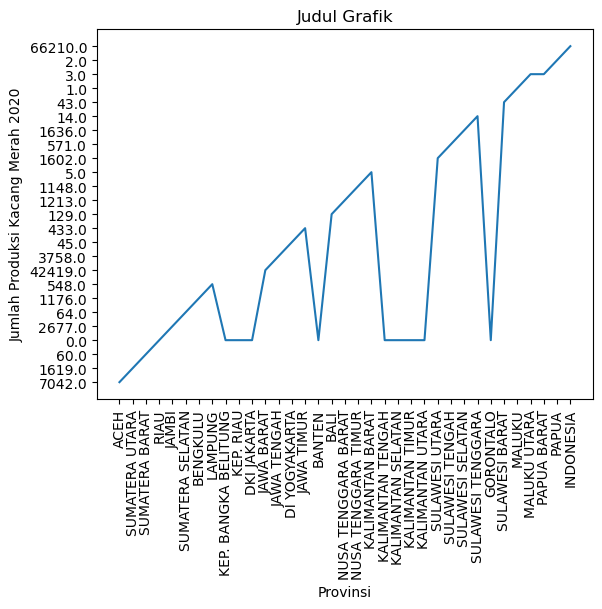

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file Excel
df = pd.read_excel('Produksi_Tanaman_Sayuran.xlsx')

df['Provinsi'] = df['Provinsi'].astype('str')
df['KacangMerah2020'] = df['KacangMerah2020'].astype('str')

# Buat grafik
plt.plot(df['Provinsi'], df['KacangMerah2020'])
plt.title('Judul Grafik')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Produksi Kacang Merah 2020')
plt.xticks(rotation=90)
plt.show()


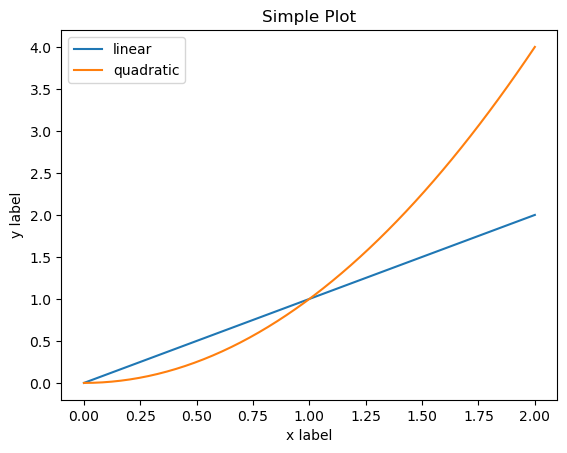

In [3]:
import numpy as np 
import matplotlib.pyplot as plt


x = np.linspace(0, 2)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
# plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

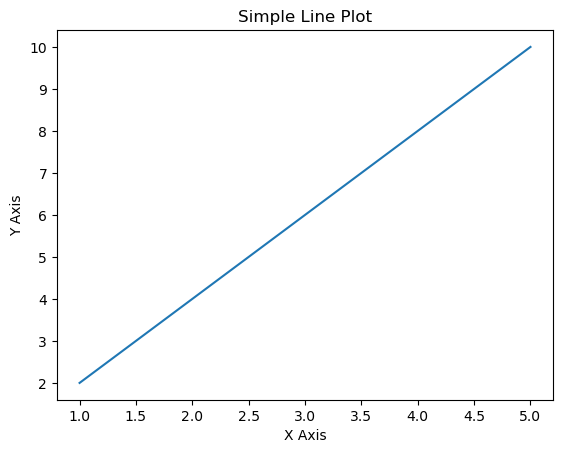

In [4]:
#  Membuat plot garis 

import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Simple Line Plot')
plt.show()

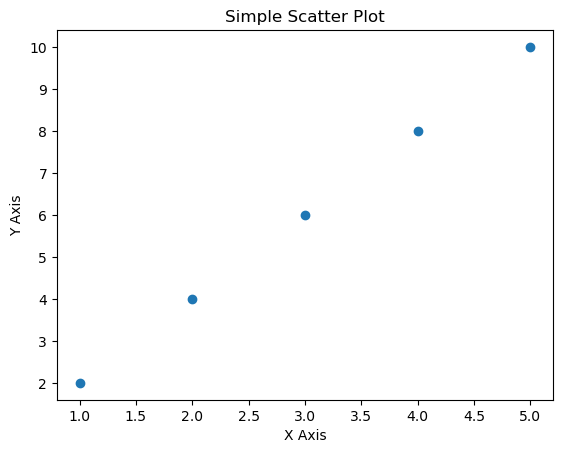

In [5]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.scatter(x, y)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Simple Scatter Plot')
plt.show()

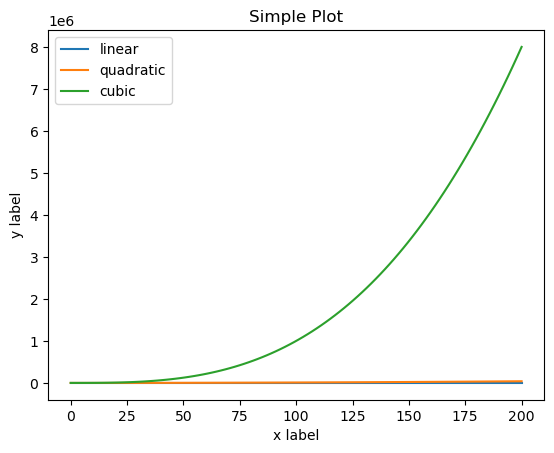

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
x = np.linspace(0, 200, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()